[[5 4 6 2 3 1 0]
 [5 4 6 2 3 1 0]
 [6 4 5 2 3 0 1]
 [4 3 5 0 0 2 1]
 [5 6 4 2 3 1 0]
 [5 6 4 1 3 2 0]
 [3 5 6 2 4 1 0]
 [5 4 6 2 3 0 1]
 [2 4 5 0 3 1 0]
 [5 6 4 1 3 2 0]
 [5 4 6 2 3 1 0]]
Similaridade média de cada placa:
SIX8E63: 4.36
JIX9E43: 4.36
SIK9E13: 2.82
SIX0073: 1.27
SYK7E63: 3.91
SYK7E83: 3.18
BIX9E63: 2.64
SIX9E23: 3.55
BJK4E54: 3.18
SYK7E82: 3.18
JIK9E83: 4.36

Placa com maior similaridade média (mais provável de estar correta): SIX8E63


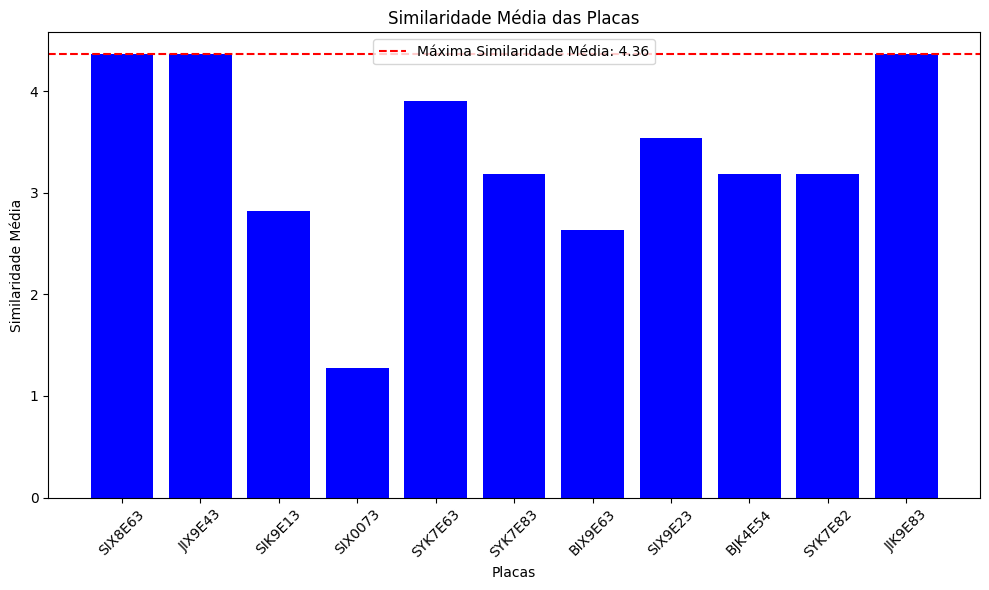

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Lista de placas
placas = [
    "SIX8E63",
    "JIX9E43",
    "SIK9E13",
    "SIX0073",
    "SYK7E63",
    "SYK7E83",
    "BIX9E63",
    "SIX9E23",
    "BJK4E54",
    "SYK7E82",
    "JIK9E83",
]

# Codificar as placas em números
def codificar_placas(placas):
    le = LabelEncoder()
    placas_codificadas = []
    for placa in placas:
        le.fit(list(placa))  # Fit no LabelEncoder para cada placa
        codificada = le.transform(list(placa))
        placas_codificadas.append(codificada)
        
    return np.array(placas_codificadas)

# Codificar as placas
X = codificar_placas(placas)
print(X)

# Calcular a similaridade entre as placas
def calcular_similaridade(X):
    similaridades = np.zeros((X.shape[0], X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            similaridades[i, j] = np.sum(X[i] == X[j])
    return similaridades

# Calcular a similaridade média de cada placa com as outras
similaridades = calcular_similaridade(X)
similaridade_media = np.mean(similaridades, axis=1)

# Encontrar a placa com a maior similaridade média
placa_mais_similar = placas[np.argmax(similaridade_media)]

# Exibir resultados
print("Similaridade média de cada placa:")
for placa, sim in zip(placas, similaridade_media):
    print(f"{placa}: {sim:.2f}")

print(f"\nPlaca com maior similaridade média (mais provável de estar correta): {placa_mais_similar}")

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(placas, similaridade_media, color='blue')
plt.xlabel('Placas')
plt.ylabel('Similaridade Média')
plt.title('Similaridade Média das Placas')
plt.xticks(rotation=45)
plt.tight_layout()

# Destacar a placa com maior similaridade média
max_similaridade = max(similaridade_media)
plt.axhline(y=max_similaridade, color='r', linestyle='--', label=f'Máxima Similaridade Média: {max_similaridade:.2f}')
plt.legend()

# Mostrar gráfico
plt.show()